In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("/content/ALL.csv")
data.head()

In [ ]:
data.corr(method ='pearson')

In [ ]:
data.iloc[:,[1,2,3,4,5,7,8,9,10,11,12,13]].head(2)

In [ ]:
x = np.array(data.iloc[:,[1,2,3,4,5,7,8,9,10,11,12,13]])
x[:3]

In [ ]:
y = data.iloc[:,0]
y[:3]

0    39.556713
1    20.563726
2    36.543621
Name: Output, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
score = []
for i in range(100000):
  xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8, random_state = i)
  model = LinearRegression()
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  r2 = r2_score(ytest,ypred)
  score.append(r2)

In [ ]:
np.max(score)

0.9359659583442488

In [ ]:
np.argmax(score)

91701

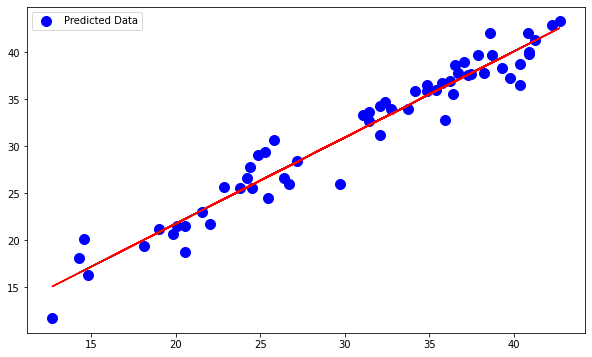

Random state is 91701 and max R2 is 93.59659583442487


In [ ]:
### Line of Regression for Testing Samples
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8, random_state = 91701)
model = LinearRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
plt.figure(figsize=(10,6))
plt.scatter(ytest,ypred,color="Blue",label="Predicted Data",s=100)

#find line of best fit
a, b = np.polyfit(ytest, ypred, 1)

#add line of best fit to plot
plt.plot(ytest, a*ytest+b, color ='r')
plt.legend()
plt.show()

c = model.intercept_
### Slope
# m = model.coef_
# print(m,c)
print("Random state is "+str(np.argmax(score))+" and max R2 is "+ str(np.max(score)*100))